# 0.0 Problem Statement

Predict the sold price of the property

# 1.1 Take a Quick Look at Data Structure

The goal of this section is to analyze the data and only keep data that is likely to be useful to us. Processing data for ML algorithm will be done in later sections

In [107]:
import PreprocessingPipeline

In [108]:
dir = r"C:\Users\KI PC\OneDrive\Documents\Software Engineering and Computer Science\Internships\Riipen - KnockNow\BC-House-Pricing-Model"
house_data = PreprocessingPipeline.load_data(dir, "Spreadsheet")

In [109]:
import pandas as pd
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)

In [110]:
house_data.head()

,PicCount,Pics,ML #,Status,Address,S/A,Price,List Date,DOM,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age,Frontage - Feet,Depth,#Kitchens,TypeDwel,Style of Home,Complex/Subdivision Name,Area,City,Neighborhood Code,Public Remarks,Realtor Remarks,Region,Search Date,Sold Date,Sold Price,Showing Appts,Sold Price per SqFt,Sold Price Per SQFT,Status Change Date,Storeys in Building,View,View - Specify,Virtual Tour URL,Zoning,URL 4,Postal Code,Postal Code.1,Postal Code.2,Postal Code.3,Owner Name,No. Floor Levels,Municipality,Lot Sz (Sq.Ft.),List Price,Full Baths,Full Height,Frontage - Metres,Floor Area Fin - Total,Entry Date,Expiry Date,Distance to Pub/Rapid Tr,Dist to School/School Bus,Display Addr on Internet,Days On MLS,Crawl Height,"N""PicCount""",Postal Code.4,Postal Code.5,Postal Code.6,Postal Code.7,Postal Code.8,Postal Code.9,Postal Code.10,Postal Code.11,Postal Code.12,Postal Code.13,Postal Code.14,Postal Code.15,Room 1 Dimension 1,Room 1 Dimension 2,Room 1 Level,Room 1 Type,Room 2 Dimension 1,Room 2 Dimension 2,Room 2 Level,Room 2 Type,Room 3 Dimension 1,Room 3 Dimension 2,Room 3 Level,Room 3 Type,Room 4 Dimension 1,Room 4 Dimension 2,Room 4 Level,Room 4 Type,Room 5 Dimension 1,Room 5 Dimension 2,Room 5 Level,Room 5 Type,Room 6 Dimension 1,Room 6 Dimension 2,Room 6 Level,Room 6 Type,Room 7 Dimension 1,Room 7 Dimension 2,Room 7 Level,Room 7 Type,Room 8 Dimension 1,Room 8 Dimension 2,Room 8 Level,Room 8 Type,Room 9 Dimension 1,Room 9 Dimension 2,Room 9 Level,Room 9 Type
0,1.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,V336802,T,511 BALLANTREE ROAD,VWVGM,"$499,600",4/22/2003,130,4,3,"2,390",1964.0,39.0,100.0,125/EFF,1,HOUSE,NaN,NaN,West Vancouver,NaN,020,"4 bdrm family home w/suite potential, with upd...",All meas approx & to be verified by buyer. Som...,Greater Vancouver,8/30/2003,NaN,NaN,Phone L.R. First,NaN,NaN,8/30/2003,NaN,Yes,NaN,NaN,SFD,NaN,V7S 1V9,V&M OUNJIAN,2.0,West Vancouver,"12,448.00","$499,600",2,NaN,NaN,"2,390",4/23/2003 12:00 AM,8/30/2003,1/2B,NEAR,No,NaN,NaN,statusColor5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,R2465033,T,5799 MARINE DRIVE,VWVEH,"$499,999",6/11/2020,132,0,0,102,9999.0,999.0,102.0,100,0,OTHER,OTHER,NaN,West Vancouver,Vancouver,NaN,"BC Assessment at $860,000! Very rare opportuni...","Measurements are approximate, buyer should ver...",Greater Vancouver,10/21/2020,NaN,NaN,Phone L.R. First,NaN,NaN,10/21/2020,NaN,Yes,MARINE AND OCEAN,https://www.youtube.com/watch?v=cKXLi8WLX30,RS4,NaN,V7W 2S1,**Privacy Protected**,1.0,NaN,"12,568.00","$499,999",0,NaN,31.09,102,6/12/2020 4:42 PM,10/21/2020,NaN,NaN,No,NaN,NaN,statusColor5 priceDecrease f-form-price-decrea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,V384724,S,490 BAYVIEW ROAD,VWVLB,"$515,000",3/5/2004,8,4,3,"2,162",1981.0,23.0,75.0,120 SF,2,HOUSE,NaN,NaN,West Vancouver,NaN,537,"Freshly updated, this house is sparkly clean. ...",NaN,Greater Vancouver,3/13/2004,3/13/2004,"$515,000",Phone L.R. First,$238.21,$238.21,3/13/2004,NaN,Yes,NaN,NaN,SFD,NaN,V0N 2E0,D. SCHWINGBOTH,2.0,Lions Bay,"12,754.00","$515,000",3,NaN,NaN,"2,162",3/12/2004 12:00 AM,6/1/2004,NaN,NaN,No,1.0,NaN,statusColor2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,V352689,S,60 GLENMORE DRIVE,VWVGM,"$537,000",7/26/2003,8,4,3,"3,200",1955.0,48.0,0.0,12691 SF IRR,1,HOUSE,2ST,NaN,West Vancouver,NaN,020,"What a great family home! 4 bdrms, 3 baths, hu...",Call

In [232]:
house_data["Address"].value_counts()

1266 OTTABURN ROAD                      30
106 BONNYMUIR DRIVE                     28
2723 CHELSEA COURT                      28
4215 EVERGREEN AVENUE                   26
345 INGLEWOOD AVENUE                    25
928 GROVELAND ROAD                      24
3529 MATHERS AVENUE                     24
460 HILLCREST STREET                    24
1418 BRAMWELL ROAD                      22
1437 CHIPPENDALE ROAD                   22
991 CROSS CREEK ROAD                    21
3911 SOUTHRIDGE AVENUE                  20
5124 MARINE DRIVE                       20
3345 CRAIGEND ROAD                      20
1257 CHARTWELL PLACE                    20
3906 MARINE DRIVE                       20
4950 KEITH ROAD                         20
606 BARNHAM ROAD                        20
1475 3RD STREET                         20
661 KENWOOD ROAD                        20
621 KENWOOD ROAD                        20
420 HILLCREST STREET                    20
2725 ROSEBERY AVENUE                    20
3525 WESTMO

In [235]:
house_data_sold.loc[house_data["Address"] == "1266 OTTABURN ROAD", ["Sold Date", "Sold Price", "TotFlArea"]]

,Sold Date,Sold Price,TotFlArea
18,10/11/2005,722000.0,3084.0
70,9/29/2016,950000.0,3165.0
123,9/16/2006,1115000.0,3143.0
168,10/18/2012,1288000.0,2730.0
213,4/23/2020,1441110.0,3182.0
263,10/20/2009,1695000.0,3192.0
522,5/11/2009,3500000.0,6300.0
682,2/19/2009,901000.0,2229.0
692,9/19/2013,940000.0,2381.0
1235,5/15/2009,845000.0,1350.0


In [111]:
house_data.shape

(28973, 108)

Description of Each Feature

- Sold Date: The date the property Sold

- PicCount: Number of pictures of property

- Pics: URL for pictures

- ML #: MLS listing number

- Status: Status of the home; S: Sold, T: terminated, X: expired, A: Active
    - We should only pick the data where Status is "S" since that's when we have "Sold Price" and that is what we should predict

- Address: Address of the property
    - Would be interesting to see a property appear twice here and see how that gets handled by ML algorithm

- S/A: Area code. 
    - Example Area Code: VWVBP where VW stands for Vancouver West and rest of the code identifies a more specific Area. Might need to use this column for stratified sampling

- Price: The price of listing

- List Date: The listing date for the property

- DOM: Short for day on market. How many days the property took to sale
   - If we wanted to build a model to predict price, likely the property has not sold yet but if DOM was important, we should still use it as a feature. We could say, if you were to sell it today, your property would go for this much and each day you wait, your property value starts going up / down depending on what the model says

- Tot BR: Total number of bedrooms

- Tot Baths: Total number of bathrooms

- TotFlArea: Total area of property

- Yr Blt: The year the property was built

- Age: The age of the home.
    - Have to look at a lot of age types so algorithm learns properly. Probably use year build and current year (use a function to calculate age and drop this column)
    
- Frontage - Feet: Width of lot along road property fronts

- Depth - Depth of the lot
    
- #Kitchens - Number of kitchens in the home

- TypeDwel - Type of dwelling (HOUSE/HACR/OTHER)

- Style of Home - Rancher/Duplex/Apartment/Single Family

- Complex/Subdivision Name - Unknown

- List Price - The price the house is listed at
  - I am thinking that we don't include this as a target variable. We should help to predict Sold Price and then determine List Price accordingly

- Original Price - Asking Price
   - Not sure why it is here and how it is different than original price

- Sold Price - the price the property sold for

- Approx.Yr of Renos/Addns - the last year the property was renovated or things were added to the property
    - Lots of null values. Is it safe to assume that if we have null values then no renovation or add ons were added to the house

- Area: Geographic area/location (West Vancouver Only)

- City: City of the house (Vancouver Only)

- Region: Region of the property (Greater Vancouver Only)

- Neighborhood Code - Unknown

- Dist to School/School Bus: Self explanatory
    - Lot's of different type of values. Likely need to transform this column by using latitute and longitue

- Distance to Pub/Rapid Tr: Self explanatory
    - Lot's of different type of values. Likely need to transform this column by using latitute and longitude

- Floorplan URL: Probably URL to the Floorplan
    - Lot's of missing values

- Lot Sz (Sq.Ft.)
    - Seems a bit too big (see distribution later for more details)

- Owner Name - Name of the owner (Values seems off)

- Parking Places - Covered: Total number of covered parking Places
    - Description of covered parking places: https://www.apartmentguide.com/blog/what-is-covered-parking/
    - Significant number of null values. Easy way is to just put 0 when we have null values. Filing in this data will be very hard to do

- Parking Places - Total: Total number of parking places

- Prev Price: The price the property was listed for last time
    - If the price changed then this is the old price

- Previous Exp Date: Last date the listing for same house expired
    - Lot's of missing values

- Previous Price Sys: N/A
    - All values are missing

- Price Date: Unknown
    - Lots of missing values (~90%)

- Price Per SQFT
   - Seems to be Sold Price / ToalFlArea
   - Probably should not use a predictor feature as we are trying to predict Sold Price

- View: Unknown (Yes/No)

- View - Specify: Lot's of qualitative words describing view from the house. Likely 
   - need a lot of feature engineering and likely don't need it. Can decode that by looking at location 

- Virtual Tour URL: Link to Virtual Tour.
    - Lots of missing values

- VOW Comment: N/A

- VOW Comment.1: N/A

- Zoning: Section of City
    - Not sure what this is
    - All missing values
    
- VOW Comment.2: N/A
    - All missing values

- VOW Comment.3: N/A
    - West Vancouver / Vancouver. Looks like useless info

- Protected Owner Name: N/A
    - Not sure what this is. Wide range of values

- '#' of Pets: Unknown

- City: City of listing
    - Values are not matching the description

- Floor Area - Unfinished: Unfinished floor area

- Floor Area Fin - Total: Total finished floor area

- Floor Area Fin - Main Flr: Total finished area making up main floor

- Floor Area Fin - BLW Main: Below main floor finished area in sqft

- Floor Area Fin - Basement: Basement floor area in sqft

- Floor Area Fin - Abv Main: Above main floor area finished

- Public Remarks: Description of listed property

- Realtor Remarks: Description of listed property as per realtor

- Pub Listing on Internet: Yes/No, is the public listing on the internet

- Protected Owner Name.1: Unknown

- Full Height: Unknown

- Crawl Height: Unknown

- Part Height: Unknown

- VOW AVM: Unknown

- Title Search: True/False

- Sold Price per SqFt: Sold price per square feet

- Sold Date: The day the property sold

- Confirm Sold Date: Confirmed sold date

- Sold Price Per SQFT: Sold price per square foot
    

- Showing Appts: Procedure for booking appointments for seeing the property

- Status Change Date: Unknown

- Storeys in Building: Unknown

- URL: Unknown

- Postal Code: Postal Code of the address

- Postal Code.1, Postal Code.2, ... Postal Code.15 - Unknown

- No. Floor Levels - Unknown

- Municipality: Municipilaty of the property

- Full Baths: Unknown

- Full Height: Unknown

- Frontage - Metres: Width of lot along road property fronts
    - Data type seems to be date so this column does not make sense

- Entry Date: Unknown

- Expiry Date: Unknown

- Display Addr on Internet - Unknown

- Days on MLS - Unknown

- Columns with names (Room # Dimension Columns): Dimensions of the rooms

- Columns with names (Room # Level): Unknown

- Columns with names (Room # Type): Unknown



In [112]:
house_data.iloc[:, :100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28973 entries, 0 to 28972
Data columns (total 100 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PicCount                   27631 non-null  float64
 1   Pics                       28973 non-null  object 
 2   ML #                       28973 non-null  object 
 3   Status                     28973 non-null  object 
 4   Address                    28973 non-null  object 
 5   S/A                        28973 non-null  object 
 6   Price                      28973 non-null  object 
 7   List Date                  28973 non-null  object 
 8   DOM                        28973 non-null  int64  
 9   Tot BR                     28973 non-null  int64  
 10  Tot Baths                  28973 non-null  int64  
 11  TotFlArea                  28954 non-null  object 
 12  Yr Blt                     28755 non-null  float64
 13  Age                        28932 non-null  fl

In [113]:
house_data.iloc[:, 101:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28973 entries, 0 to 28972
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Room 8 Dimension 2  0 non-null      float64
 1   Room 8 Level        0 non-null      float64
 2   Room 8 Type         0 non-null      float64
 3   Room 9 Dimension 1  0 non-null      float64
 4   Room 9 Dimension 2  0 non-null      float64
 5   Room 9 Level        0 non-null      float64
 6   Room 9 Type         0 non-null      float64
dtypes: float64(7)
memory usage: 1.5 MB


It seems that we can't use the dataframe.info() method with more than 100 columns which is why we have split things up like shown above

Before we get started, here is a list of columns which's data does not make sense or contains way too many missing values or both. I have outputted the first few values of them below to illustrate that the column name and data just don't match

Columns such as Room 1 Type has good data but there are lot of missing values to be useful

In [114]:
useless_feature_names_1 = [cols for cols in house_data.columns if "Postal Code." in cols]

useless_feature_names_2 = [cols for cols in house_data.columns if "Room" in cols]

#double checked that column naming is correct
useless_feature_names_3 = ["No. Floor Levels", "Municipality", "Lot Sz (Sq.Ft.)", "Full Baths", "Full Height", "Frontage - Metres", "Floor Area Fin - Total", "Display Addr on Internet", "Days On MLS", "Storeys in Building", "Owner Name", "Virtual Tour URL"]

useless_feature_names = useless_feature_names_1 + useless_feature_names_2 + useless_feature_names_3 

In [115]:
def unique_values(df, col_names, max_unique_values = 10):
    for col_name in col_names:
        print("Unique Values For " + col_name + "\n")
        unique_values = df[col_name].value_counts()
        print(unique_values.iloc[:max_unique_values])
        print(" ")

In [116]:
unique_values(house_data, useless_feature_names)

Unique Values For Postal Code.1

**Privacy Protected**                4651
RODGERS CREEK LIMITED PARTNERSHIP      25
Y. ZHANG                               19
K. VIRANI                              17
A. ZEIBAK                              16
Y. WANG                                16
Lattitude Ventures Inc.                16
Y. LI                                  16
J. GUJRAL                              15
X. LI                                  15
Name: Postal Code.1, dtype: int64
 
Unique Values For Postal Code.2

3.0      7472
2.0      6164
1.0      1052
4.0       171
5.0        13
0.0         8
100.0       1
Name: Postal Code.2, dtype: int64
 
Unique Values For Postal Code.3

West Vancouver       10813
Lions Bay              199
Whistler                71
City of Vancouver        4
Anmore                   1
Dist. of Squamish        1
Richmond                 1
Bella Coola Rural        1
Name: Postal Code.3, dtype: int64
 
Unique Values For Postal Code.4

13,504.00    116
13,940.00

0.00     2018
12'       651
10'       640
0.0       610
11'       507
15.24     456
13'       400
14'       396
15'       311
15.24     267
Name: Full Height, dtype: int64
 
Unique Values For Frontage - Metres

Main     11572
Above      345
0          152
2,000       85
3,000       74
2,400       51
2,500       51
2,800       50
2,200       47
Below       47
Name: Frontage - Metres, dtype: int64
 
Unique Values For Floor Area Fin - Total

Dining Room    5431
Kitchen        4262
Living Room     995
Family Room     396
Bedroom         217
NEAR            215
CLOSE           135
Near            134
Eating Area     124
Office           95
Name: Floor Area Fin - Total, dtype: int64
 
Unique Values For Display Addr on Internet

statusColor2                                                  876
statusColor5                                                  818
statusColor4                                                  669
14'                                                           375
15' 

For price, we will use Sold Price as target variable and ignore the following columns related to price:"Column Names.xlsx"

- Price
- List Price
- Sold Price per SqFt
- Sold Price Per SQFT.1


For dates related to the listing, we will utilize List Date, DOM, Sold Date and Ignore the following columns related to date
- Entry Date
- Expire Date
- Search Date
- Status Change Date

We will also ignore the following columns with reasons for ignoring them as written beside the column name

- PicCount (likely not very useful)
- Pics (likely not very useful)
- ML # (just identifies a listing so not useful)
- URL 4 (unknown and likely not useful)

There are still a quite a lot of categorical variables left. Let's take a look at few of them. The first one we will look at is Status

In [117]:
house_data["Status"].value_counts()

S    13073
T     8922
X     6581
A      379
C       17
W        1
Name: Status, dtype: int64

As stated above, S: Sold, T: terminated, X: expired, A: Active

We will likely filter our data to include rows where Status = "S"

In [118]:
for status in house_data["Status"].value_counts().index:
    print("Status = " + status)
    print(house_data.loc[house_data["Status"] == status, ["Sold Price", "Sold Date"]].isnull().sum())
    print("")

Status = S
Sold Price    0
Sold Date     0
dtype: int64

Status = T
Sold Price    8922
Sold Date     8922
dtype: int64

Status = X
Sold Price    6581
Sold Date     6581
dtype: int64

Status = A
Sold Price    379
Sold Date     379
dtype: int64

Status = C
Sold Price    17
Sold Date     17
dtype: int64

Status = W
Sold Price    1
Sold Date     1
dtype: int64



We see that when a property has been sold, our target variable "Sold Price" has zero null values; understandable that we also see the same pattern with SoldDate Thus, for training the algorithm, we will only use the subset of data where property actually sold

Let's take a look at location related data apart from Address (it is almost like an id column and is not useful to look at)
- S/A
- Complex/Subdivision Name
- Area
- City
- Region
- Neighbourhood Code
- Postal Code

We really need the location related data for geocoding (finding longitude and latitude) and for sampling. Address is all we need for geocoding. When an address is not valid, we might need to utilize one of the other columns. Let's take a look at the columns to see which columns we can use

In [119]:
house_data['S/A'].value_counts().iloc[:10]

VWVBP    4432
VWVAM    3402
VWVDU    2183
VWVCA    1796
VWVCW    1376
VWVSH    1156
VWVEH    1094
VWVQU    1027
VWVGM    1020
VWVWM     943
Name: S/A, dtype: int64

In [120]:
house_data['S/A'].value_counts().shape

(35,)

In [121]:
house_data['S/A'].isnull().sum()

0

We will likely use S/A column for stratified sampling

In [122]:
house_data["Complex/Subdivision Name"].value_counts().iloc[:10]

BRITISH PROPERTIES    551
AMBLESIDE             282
British Properties    235
CHARTWELL             194
DUNDARAVE             188
Ambleside             160
WHITBY ESTATES        112
Dundarave              99
CANTERBURY             98
ALTAMONT               89
Name: Complex/Subdivision Name, dtype: int64

In [123]:
house_data["Complex/Subdivision Name"].value_counts().shape

(601,)

In [124]:
house_data["Area"].value_counts()

West Vancouver    28973
Name: Area, dtype: int64

In [125]:
house_data["City"].value_counts()

West Vancouver     26552
Lions Bay            727
Furry Creek           30
Vancouver             21
North Vancouver       13
Britannia Beach       12
No City Value          5
Whistler               3
Squamish               1
Name: City, dtype: int64

In [126]:
house_data["Region"].value_counts()

Greater Vancouver    28973
Name: Region, dtype: int64

In [127]:
house_data["Neighborhood Code"].value_counts().iloc[:30]

006     1659
004     1334
003     1118
005     1045
014      915
024      810
021      708
013      705
008      689
019      676
031      585
022      580
020      521
025      511
001      479
017      473
012      466
023      448
537      444
016      412
015      363
17.0     361
007      325
5.0      314
7.0      269
19.0     234
4.0      231
3.0      212
011      201
700      199
Name: Neighborhood Code, dtype: int64

In [128]:
house_data["Neighborhood Code"].shape

(28973,)

In [129]:
house_data["Postal Code"].isnull().sum()

42

In terms of which column to use for Stratified sampling, we cannot use Complex/Subdivision Name as they are too many missing values

We cannot use "Neighborhood Code" as this column is unknown

We cannot use "Area" or "Region" as we only have one category

So the choice is down to S/A and City and I am choosing to us S/A for stratified sampling due to more granularity

We can use the City column for geocoding
 when the address is not valid.

We only need to use Address for geocoding. However, when an address is invalid, we will use Area instead for geocoding.

In Summary, we will use S/A for stratified sampling and Address/City for geocoding


There are two other location related columns to discuss
- Distance to Pub/Rapid Tr
- Dist to School/School Bus

In [130]:
house_data['Distance to Pub/Rapid Tr'].value_counts().iloc[:10]

Main      11553
NEAR        977
CLOSE       670
Near        637
1 BLK       427
Close       367
Above       343
near        298
1           236
2 BLKS      220
Name: Distance to Pub/Rapid Tr, dtype: int64

In [131]:
house_data['Distance to Pub/Rapid Tr'].value_counts().shape

(623,)

There are a lot of qualitative values here. In addition, the values in this columns are not precicise (someone's definition of "near" could be signficanlty differnet than someone elses' defintion of "near"). So, we will drop this column in initial model

In [132]:
house_data['Dist to School/School Bus'].value_counts().iloc[:10]

No                14068
Kitchen            4921
Dining Room        4164
Family Room         772
Eating Area         472
Living Room         383
Bedroom             325
Foyer               154
Master Bedroom      151
Den                 108
Name: Dist to School/School Bus, dtype: int64

In [133]:
house_data['Dist to School/School Bus'].value_counts().shape

(47,)

These values don't make any sense considering what the column name is. We will drop this column

There is another somewhat location related variable which is "Zoning". Let's take a look

In [134]:
house_data['Zoning'].value_counts().iloc[:10]

SFD     12915
SF       4954
RS3      3170
RES      1858
RS5       876
RS4       689
RS-3      542
RS10      456
RS2       336
RS1       252
Name: Zoning, dtype: int64

In [135]:
house_data['Zoning'].value_counts().shape

(362,)

This column contains a lot of different values and zoning is really used by the government for planning purposes and is not very useful. So we will ignore them

In [136]:
house_data['TypeDwel'].value_counts()

HOUSE    28551
HACR       166
MANUF      140
OTHER       68
TWNHS       32
RECRE       10
MNFLD        3
Name: TypeDwel, dtype: int64

In [137]:
house_data['Style of Home'].value_counts().iloc[:15]

2BSMT         9339
2ST           8706
3ST           3883
RBBMT         1470
RANBG         1185
3LEV          1150
OTHER          527
1ST            374
SPLIT          266
4LEV           257
1ST+           139
MANUF          132
2ST, SPLIT     128
1ST, RANBG     119
BSMNT          119
Name: Style of Home, dtype: int64

In [138]:
house_data['Style of Home'].value_counts().shape

(110,)

There are lots of values here. We can use one hot encoding but it will slow algorithm down. So we will likely drop this column for first model

In [139]:
house_data['Showing Appts'].value_counts()

Phone L.R. First              26240
Phone Other                    1307
ShowingTime                     765
Touchbase                       516
Phone Seller First              103
Keybox; Appt. Not Required       23
Phone Tenant First                3
Name: Showing Appts, dtype: int64

In [140]:
house_data['View'].value_counts()

Yes    20975
No      2630
Name: View, dtype: int64

I am unsure about what Yes or No means here. We will drop this column

In [141]:
house_data['View - Specify'].value_counts()[:20]

OCEAN                       691
Ocean                       294
OCEAN VIEW                  290
OCEAN & CITY                260
WATER                       242
CITY & OCEAN                223
OCEAN VIEWS                 167
MOUNTAIN                    155
.                           152
CITY & WATER                111
Ocean Views                 105
SPECTACULAR OCEAN & CITY    102
VIEW                         90
Ocean View                   89
Ocean & City                 85
SPECTACULAR CITY & OCEAN     83
Mountains                    81
OCEAN AND CITY               78
WATER & CITY                 78
WATER VIEW                   65
Name: View - Specify, dtype: int64

View - Specify column contains lots of qualitative words describing the view of the property.  Likely need a lot of feature engineering and likely don't need it. If some things are listed over and over here such as close to lake then we can use geocoding later on

Public Remarks and Realtor Remarks are qualitative variables which are hard to extract useful info from. So we will ignore them

Let's take a look at numerical data briefly. We are interested in the following columns
- Tot BR
- Tot Baths
- TotFlArea
- YrBlt
- Age
- Frontage-Feet
- Depth
- #Kitchens
- Sold Price

Let's look at the first view values of each of the numerical column to see if we need to transform them slightly (example: remove comma seperator) to be able to convert them to numerical columns

In [142]:
numerical_columns = ["DOM", "Tot BR", "Tot Baths", "TotFlArea", "Yr Blt", "Age", "Frontage - Feet", "Depth", "#Kitchens", "Sold Price"]

unique_values(house_data, numerical_columns)

Unique Values For DOM

7     496
6     424
8     388
92    385
9     355
10    354
4     345
5     344
3     342
1     329
Name: DOM, dtype: int64
 
Unique Values For Tot BR

4    9662
5    7576
3    5582
6    3516
2    1074
7     889
0     331
8     212
1     100
9      23
Name: Tot BR, dtype: int64
 
Unique Values For Tot Baths

3    8009
4    6360
5    4178
2    3828
6    2495
7    1698
8    1396
1     681
0     225
9      68
Name: Tot Baths, dtype: int64
 
Unique Values For TotFlArea

0        200
2,000    172
3,000    142
2,800    127
2,500    124
2,400    103
2,700    101
3,100     89
2,100     84
3,200     80
Name: TotFlArea, dtype: int64
 
Unique Values For Yr Blt

9999.0    976
1955.0    732
1958.0    626
1966.0    563
1988.0    550
1957.0    531
1967.0    517
1964.0    515
1989.0    506
1960.0    505
Name: Yr Blt, dtype: int64
 
Unique Values For Age

0.0      1407
1.0      1246
999.0    1152
2.0       715
3.0       555
51.0      487
52.0      483
50.0      480
53.0      474


Looking at the data above, we need to remove non numerical characters in TotFlArea and SoldPrice. There are also

In [143]:
house_data["TotFlArea"] = house_data["TotFlArea"].astype('str').str.replace(",", "").astype('float')

In [144]:
house_data["Sold Price"] = house_data["Sold Price"].astype('str').str.replace("$", "").str.replace(",", "").astype('float')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [145]:
house_data["TotFlArea"].isnull().sum()

19

In [146]:
house_data["Sold Price"].isnull().sum()

15900

Digging a bit further see this for depth. Due to lack of info about what these values mean, I am abandoning the column Depth

In [147]:
house_data.loc[house_data["Depth"].str.contains('/', na = False), ["Depth"]].head()

,Depth
0,125/EFF
8,203/110.8
10,111.46/80.18/151.8
21,134/89/130
23,109/102/127


In [148]:
house_data["Frontage - Feet"] = house_data["Frontage - Feet"].astype('str').str.replace(",", "").astype('float')

In [149]:
numerical_columns.remove("Depth")

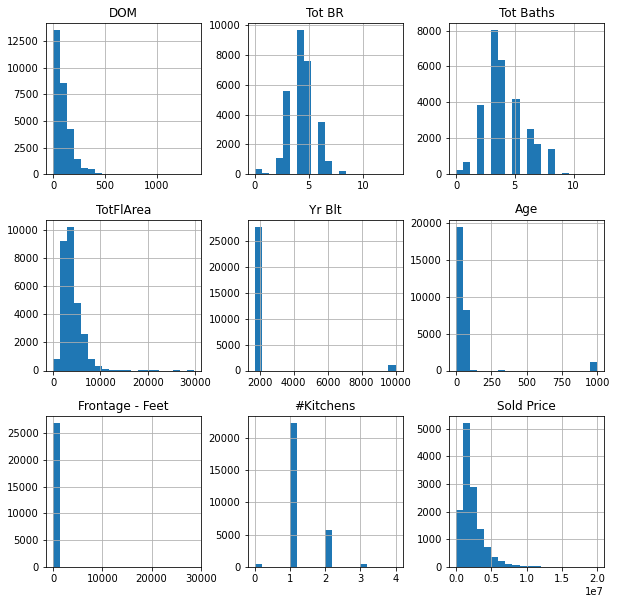

In [150]:
import matplotlib.pyplot as plt
house_data.loc[:, numerical_columns].hist(bins = 20, figsize = (10,10))
plt.show()

Some things of note:
- Yr Blt and Age has some outliers that we need to deal with
- The attributes have very different scales. We will need to scale those features, so our ML algorithm behaves nicely
- Some feature such as DOM, TotFlArea, Yr Blt is tail heavy. This may make it a bit harder for some machine learning algorithms to detect patterns. We will try transforming these attriutes later on to have more bell-shaped distributions


## 1.2 Train and Test Split

We have a couple of choices for splitting training and test data. They are:

- Using randomly shuffled row indices for test/split
- Using identifier for test/split
- Using stratified sampling.

We can test out later on using grid search, which method of splitting training and test data would be the best solution, and if the result we get even differs significantly based on how we split our training and test data. For now, let's proceed with the third method: using stratified sampling. We will use the S/A column for stratified sampling.

See the function create_train_test_set in PreprocessingPipeline.py for implementation of splitting the dataset into training and test set.

We first need to filter out our data so we only have listings that actually sold.

In [151]:
house_data_sold = house_data.loc[house_data["Status"] == "S", :]

In [152]:
house_data_sold.head()

,PicCount,Pics,ML #,Status,Address,S/A,Price,List Date,DOM,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age,Frontage - Feet,Depth,#Kitchens,TypeDwel,Style of Home,Complex/Subdivision Name,Area,City,Neighborhood Code,Public Remarks,Realtor Remarks,Region,Search Date,Sold Date,Sold Price,Showing Appts,Sold Price per SqFt,Sold Price Per SQFT,Status Change Date,Storeys in Building,View,View - Specify,Virtual Tour URL,Zoning,URL 4,Postal Code,Postal Code.1,Postal Code.2,Postal Code.3,Owner Name,No. Floor Levels,Municipality,Lot Sz (Sq.Ft.),List Price,Full Baths,Full Height,Frontage - Metres,Floor Area Fin - Total,Entry Date,Expiry Date,Distance to Pub/Rapid Tr,Dist to School/School Bus,Display Addr on Internet,Days On MLS,Crawl Height,"N""PicCount""",Postal Code.4,Postal Code.5,Postal Code.6,Postal Code.7,Postal Code.8,Postal Code.9,Postal Code.10,Postal Code.11,Postal Code.12,Postal Code.13,Postal Code.14,Postal Code.15,Room 1 Dimension 1,Room 1 Dimension 2,Room 1 Level,Room 1 Type,Room 2 Dimension 1,Room 2 Dimension 2,Room 2 Level,Room 2 Type,Room 3 Dimension 1,Room 3 Dimension 2,Room 3 Level,Room 3 Type,Room 4 Dimension 1,Room 4 Dimension 2,Room 4 Level,Room 4 Type,Room 5 Dimension 1,Room 5 Dimension 2,Room 5 Level,Room 5 Type,Room 6 Dimension 1,Room 6 Dimension 2,Room 6 Level,Room 6 Type,Room 7 Dimension 1,Room 7 Dimension 2,Room 7 Level,Room 7 Type,Room 8 Dimension 1,Room 8 Dimension 2,Room 8 Level,Room 8 Type,Room 9 Dimension 1,Room 9 Dimension 2,Room 9 Level,Room 9 Type
2,1.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,V384724,S,490 BAYVIEW ROAD,VWVLB,"$515,000",3/5/2004,8,4,3,2162.0,1981.0,23.0,75.00,120 SF,2,HOUSE,NaN,NaN,West Vancouver,NaN,537,"Freshly updated, this house is sparkly clean. ...",NaN,Greater Vancouver,3/13/2004,3/13/2004,515000.0,Phone L.R. First,$238.21,$238.21,3/13/2004,NaN,Yes,NaN,NaN,SFD,NaN,V0N 2E0,D. SCHWINGBOTH,2.0,Lions Bay,"12,754.00","$515,000",3,NaN,NaN,"2,162",3/12/2004 12:00 AM,6/1/2004,NaN,NaN,No,1.0,NaN,statusColor2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,V352689,S,60 GLENMORE DRIVE,VWVGM,"$537,000",7/26/2003,8,4,3,3200.0,1955.0,48.0,0.00,12691 SF IRR,1,HOUSE,2ST,NaN,West Vancouver,NaN,020,"What a great family home! 4 bdrms, 3 baths, hu...",Call Lauren Kent for showings 604-671-6115. Al...,Greater Vancouver,8/3/2003,8/3/2003,537000.0,Phone L.R. First,$167.81,$167.81,8/3/2003,NaN,NaN,NaN,NaN,SFD,NaN,V7S 1A8,K&D BOYD,2.0,West Vancouver,"12,691.00","$550,000",2,NaN,NaN,"2,836",7/29/2003 12:00 AM,12/31/2003,3B,3B,No,5.0,NaN,statusColor2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,V388418,S,100 OCEANVIEW ROAD,VWVLB,"$550,000",3/26/2004,4,4,3,2643.0,1972.0,32.0,96.00,150,2,HOUSE,2ST,NaN,West Vancouver,NaN,537,Great value in this 4 bedroom home PLUS 1 bedr...,NaN,Greater Vancouver,3/30/2004,3/30/2004,550000.0,Phone L.R. First,$208.10,$208.10,3/30/2004,NaN,Yes,NaN,NaN,SFD,NaN,V0N 2E0,K. HOOD,2.0,Lions Bay,"12,504.00","$535,000",3,NaN,NaN,"2,343",4/1/2004 12:00 AM,6/15/2004,NaN,NaN,No,0.0,NaN,statusColor2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10.0,//cdnparap130.paragonrels.com/ParagonImages/Pr...,V966384,S,120 OCEANVIEW PLACE,VWVLB,"$550,000",8/10/2012,234,5,3,2436.0,1970.0,42.0,78.00,NaN,1,HOUSE,2ST,NaN,West Vancouver,Lions Bay,537,Priced below land value. This cozy 5 bedroom h...,"Exceptional value, priced below assessed value...",Greater Vancouver,4/1/2013,4/1/2013,550000.0,Phone L.R. First,$225.78,$225.78,5/2/

In [153]:
strat_train, strat_train_labels, strat_test, strat_test_labels =  PreprocessingPipeline.create_train_test_set(df = house_data_sold)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
print(strat_train.shape)
print(strat_train_labels.shape)
print(strat_test.shape)
print(strat_test_labels.shape)

(10458, 107)
(10458,)
(2615, 107)
(2615,)


To compare the proportion of data in training set from each sub area, let's first also create training and test set using random sampling

In [155]:
random_train, random_train_labels, random_test, random_test_labels =  PreprocessingPipeline.create_train_test_set(df = house_data_sold, strategy = PreprocessingPipeline.Sampling.Random)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [156]:
def sa_proportions(data):
    return data["S/A"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": sa_proportions(house_data_sold),
    "Stratified": sa_proportions(strat_train),
    "Random": sa_proportions(random_train)
    }).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100

compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [157]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
VWVAL,0.028226,0.028208,0.027347,-3.112826,-0.063928
VWVAM,0.128280,0.128227,0.128897,0.480885,-0.040900
VWVBP,0.143655,0.143622,0.144483,0.576264,-0.022800
VWVBR,0.029450,0.029451,0.029069,-1.294926,0.003825
VWVCA,0.068156,0.068177,0.068847,1.013964,0.031884
VWVCB,0.013386,0.013387,0.011570,-13.568123,0.003825
VWVCD,0.018358,0.018359,0.018550,1.045531,0.003825
VWVCE,0.028073,0.028112,0.029164,3.886807,0.140070
VWVCP,0.007649,0.007650,0.007458,-2.496271,0.003825
VWVCW,0.044825,0.044846,0.044750,-0.166830,0.046489


We can see that apart from few instances, Stratified samping does a much better job in matching the proportion of data by area to the overall data set

## 1.3 Discover and Visualize the Data to Gain Insights

In [158]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='DOM', ylabel='DOM'>,
        <AxesSubplot:xlabel='Tot BR', ylabel='DOM'>,
        <AxesSubplot:xlabel='Tot Baths', ylabel='DOM'>,
        <AxesSubplot:xlabel='TotFlArea', ylabel='DOM'>,
        <AxesSubplot:xlabel='Yr Blt', ylabel='DOM'>,
        <AxesSubplot:xlabel='Age', ylabel='DOM'>,
        <AxesSubplot:xlabel='Frontage - Feet', ylabel='DOM'>,
        <AxesSubplot:xlabel='#Kitchens', ylabel='DOM'>,
        <AxesSubplot:xlabel='Sold Price', ylabel='DOM'>],
       [<AxesSubplot:xlabel='DOM', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='Tot BR', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='Tot Baths', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='TotFlArea', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='Yr Blt', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='Age', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='Frontage - Feet', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='#Kitchens', ylabel='Tot BR'>,
        <AxesSubplot:xlabel='Sold Price', ylab

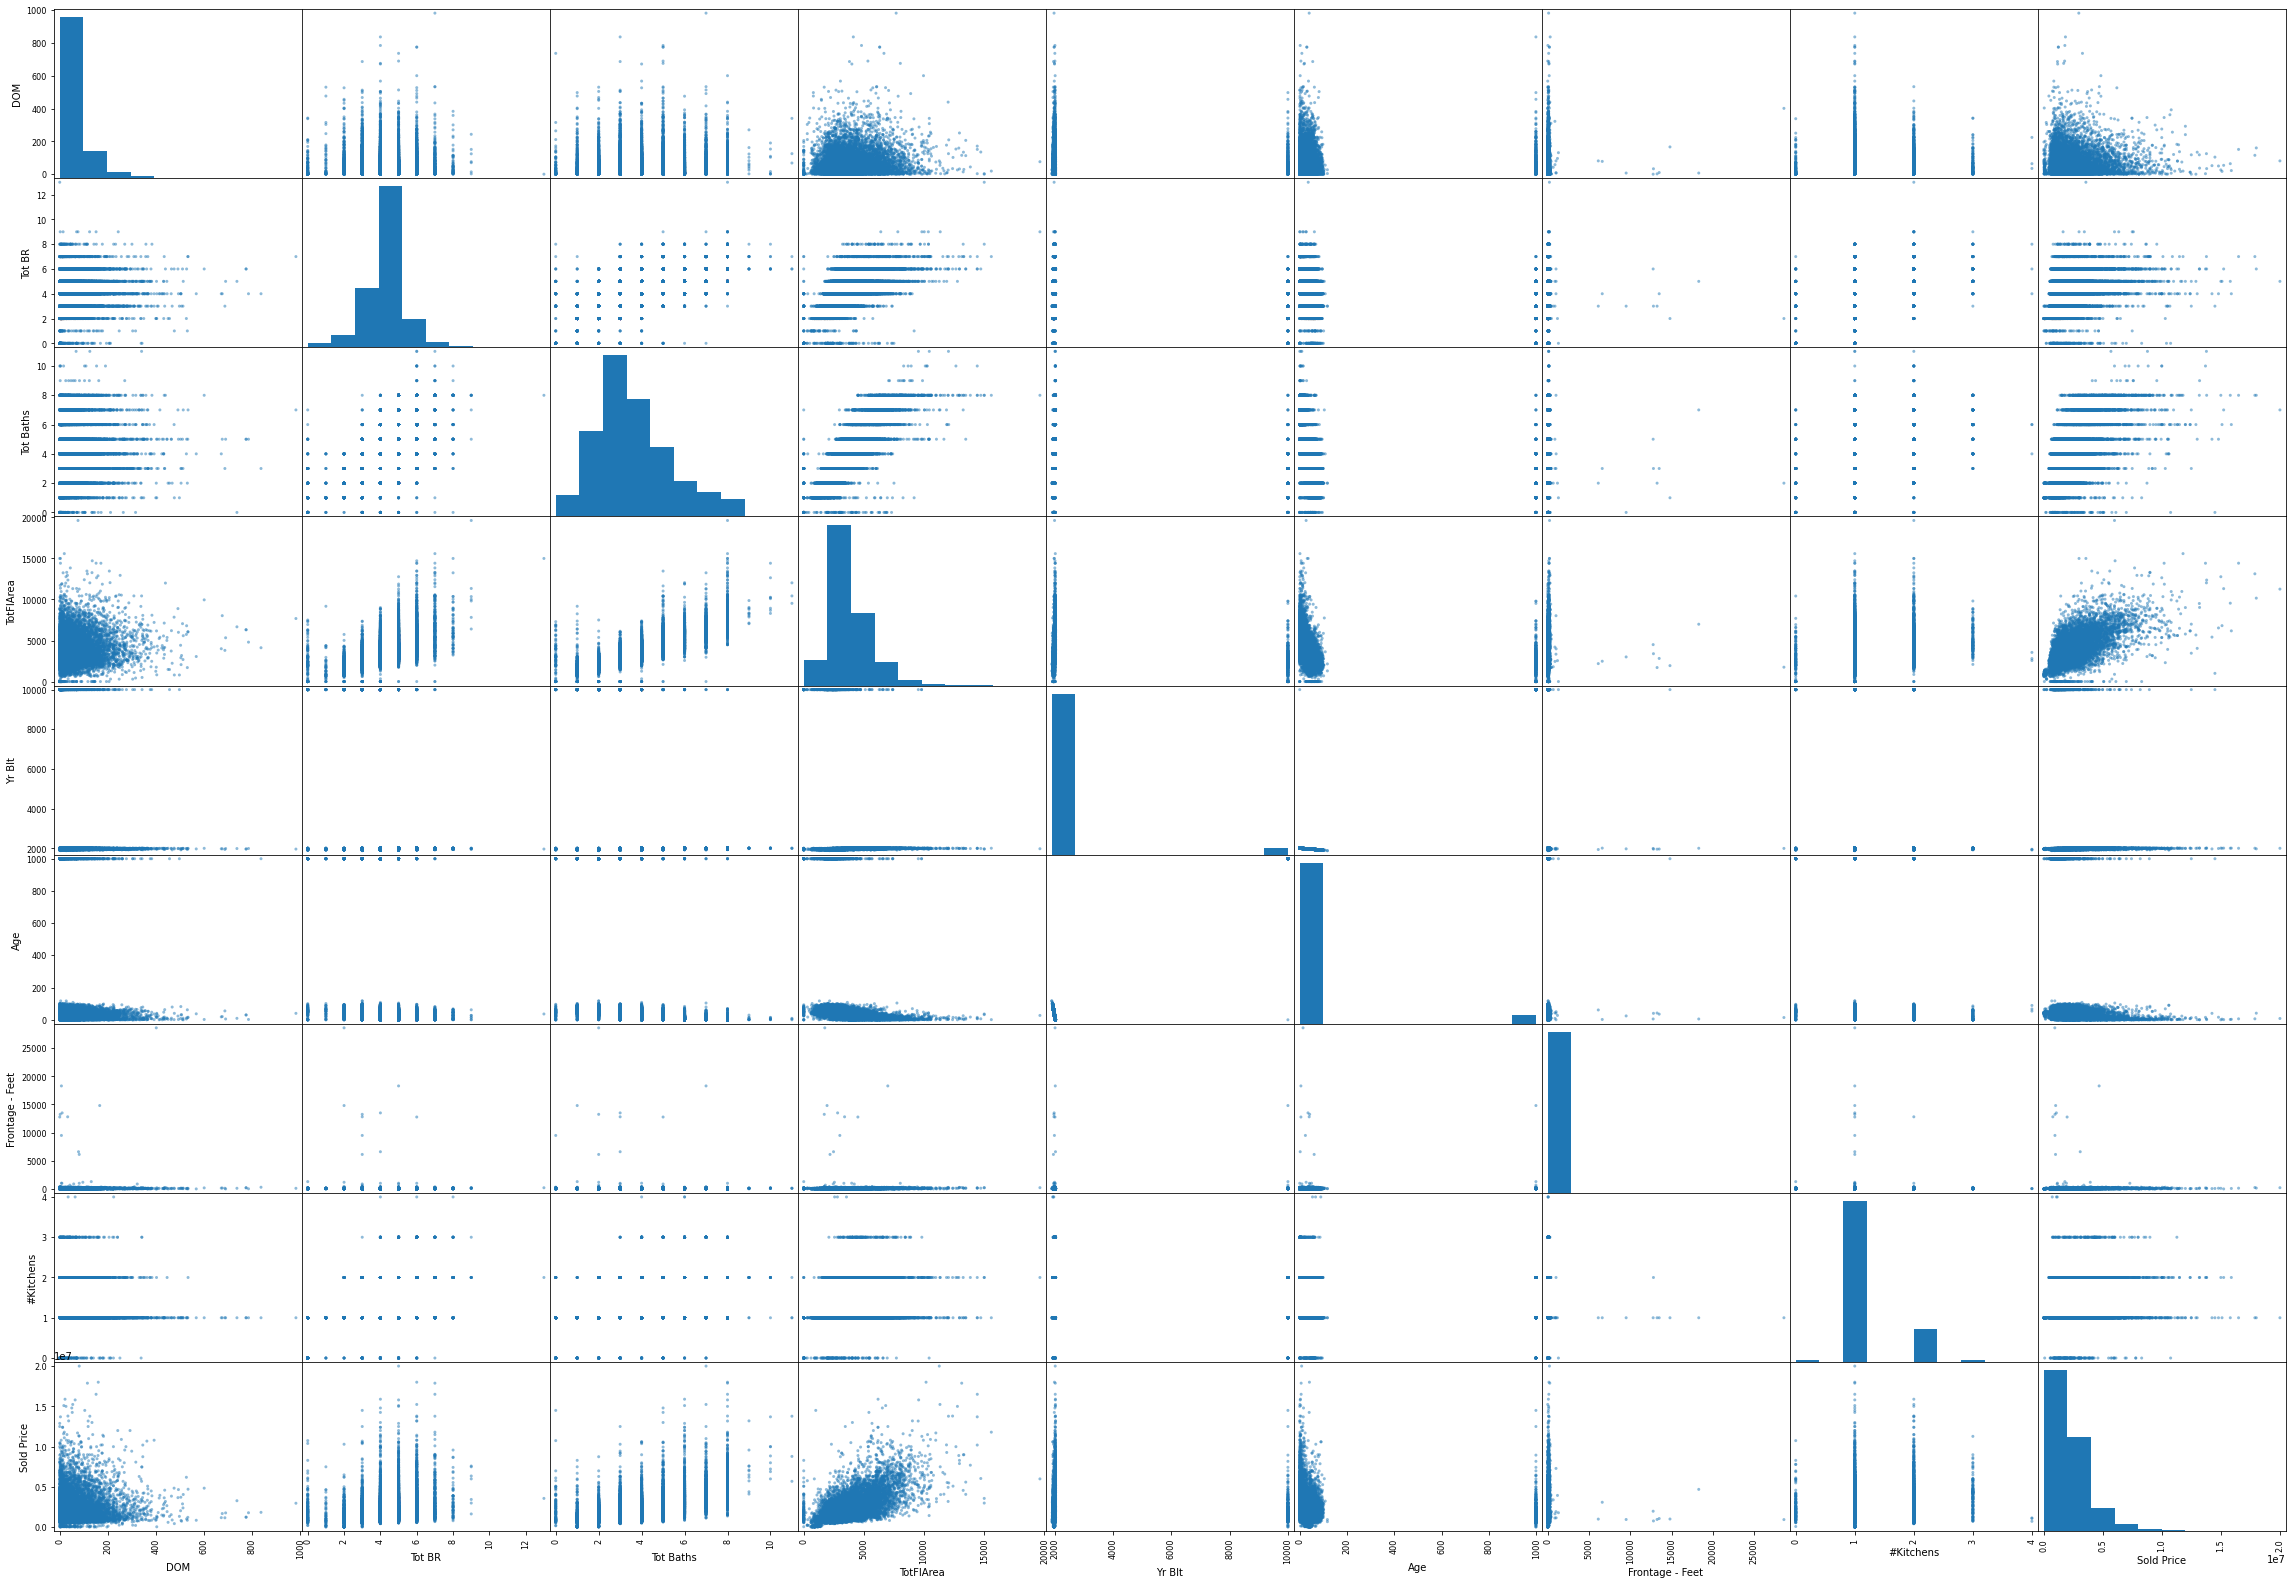

In [159]:
scatter_matrix(house_data_sold[numerical_columns], figsize = (40,28))

The main diagonal (top left to bottom right) would be full of straight lines if pandas plotted each variable against itself, which would not be very useful. So instead pandas displays a histogram of each attribute (other options are available; see the pandas documentation for more details).

The most promising attribute to predict the Sold Price is the TotalFlArea, so let’s zoom in on their correlation scatterplot

In [160]:
numerical_columns

['DOM',
 'Tot BR',
 'Tot Baths',
 'TotFlArea',
 'Yr Blt',
 'Age',
 'Frontage - Feet',
 '#Kitchens',
 'Sold Price']

<AxesSubplot:xlabel='TotFlArea', ylabel='Sold Price'>

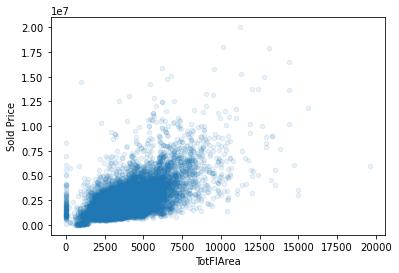

In [161]:
house_data_sold.plot(kind="scatter", x="TotFlArea", y="Sold Price",
alpha=0.1)

In [162]:
corr_matrix = house_data_sold[numerical_columns].corr()

In [163]:
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price         1.000000
TotFlArea          0.637651
Tot Baths          0.590172
Tot BR             0.315147
#Kitchens          0.132953
DOM                0.066384
Frontage - Feet    0.003516
Yr Blt            -0.053276
Age               -0.120001
Name: Sold Price, dtype: float64

As noted earlier, TotFlArea is the most useful feature in predicting Sold Price. TotBaths and Tot Br seems useful as well. 

Note that, here we are only looking at linaer relationships. In addition, some of the columns which are expected to be useful such as Location (Longitude and Latitude), Year the property was sold, does not exist yet


# 2.0 Prepare the Data for Machine Learning Algorithms

Special Columns
- Status
    - Recall that we are filtering the data to only include rows that correspond to listing that actually sold (Status = "S")
- S/A
    - We are using S/A for stratified sampling

We will use a transformer for filtering out data such that only the row where Status = "S" remains

In [164]:
filter_status = PreprocessingPipeline.ExtractSelRow("Status", "S")

In [165]:
house_data_sold_test = filter_status.fit_transform(house_data)

In [166]:
house_data_sold_test["Status"].value_counts()

S    13073
Name: Status, dtype: int64

## 2.1 Transforming Numerical Data

As a summary, we have the following numerical columns

In [167]:
numerical_columns

['DOM',
 'Tot BR',
 'Tot Baths',
 'TotFlArea',
 'Yr Blt',
 'Age',
 'Frontage - Feet',
 '#Kitchens',
 'Sold Price']

We will just use the Age column as it contains info related to Yr Blt and Yr Blt was not particularly useful in predicting Sold Price

In Addition, the following columns will be transformed in the following manner to give us numerical values:

- Sold Date: Transform to Float; the whole number part is the year the property sold and the decimal part will be number of days divided by 365

- Address & Area: Used to calculate longitude and latitude of the property in listing.

The general procedure will involve three steps for processing numerical columns
- Extract from existing columns if appropriate
- Devise a strategy for imputing missing values or outlier
- Scale the features

### 2.1.1 Longitude and Latitude Using Address

We will use Python's geopy library to transform Address to Longitude and Latitude. See the class "address_longitude_latitude" in PreprocessingPipeline for implementation


Next:
do the transformation and test it here and plot it



In [62]:
longitude_latitude = PreprocessingPipeline.AddressLatitudeLongitude("Address", "Area")

In [ ]:
house_data_sold_long_lat = longitude_latitude.fit_transform(house_data_sold)

The transform method above drops the city and area column. Also, the transform method above takes a quite a while to run. So we will save the result into a csv file so we can use it later

In [96]:
house_data_long_lat_export = pd.concat([house_data_sold[["Address", "Area"]], house_data_sold_long_lat[["Latitude", "Longitude"]]], axis = 1)

In [97]:
#drop duplicate addresses
house_data_long_lat_export.drop_duplicates(subset = "Address", inplace = True)

In [98]:
print(house_data_long_lat_export.shape)
print(house_data_sold["Address"].unique().shape)

(7490, 4)
(7490,)


In [99]:
house_data_long_lat_export.head()

,Address,Area,Latitude,Longitude
0,490 BAYVIEW ROAD,West Vancouver,49.374288,-123.274045
1,60 GLENMORE DRIVE,West Vancouver,49.364131,-123.120449
2,100 OCEANVIEW ROAD,West Vancouver,49.017095,-122.791258
3,120 OCEANVIEW PLACE,West Vancouver,49.017095,-122.791258
4,260 STEWART ROAD,West Vancouver,49.283518,-123.079390


In [100]:
house_data_long_lat_export.to_csv("longitude_latitude_data.csv")

Let's plot these coordinates just to do a sanity check that geocoding is working

In [101]:
import geopy
service = geopy.Nominatim(user_agent = "myGeocoder")
#create a base map centered around Vancouver
import folium
location_query = {'city': 'Vancouver', 'country': 'Canada'}
location_obj = service.geocode(location_query)
map_obj = folium.Map(location = [location_obj.latitude,location_obj.longitude], zoom_start = 10)

#get all locations
locations_data = list(zip(house_data_long_lat_export['Latitude'].head(), house_data_long_lat_export['Longitude'].head()))

for location_data in locations_data:
    #create a marker
    marker_obj = folium.Marker(location = [location_data[0], location_data[1]])
    #add marker to map
    marker_obj.add_to(map_obj)

In [102]:
map_obj

We only see 4 marker on the map because 100 OCEANVIEW ROAD and 120 OCEANVIEW PLACE are very close to each other

Let's see briefly if we can use merge to retrieve longitude and latitude

In [103]:
house_data_long_lat_merge_test = pd.merge(left = house_data_sold["Address"], right = house_data_long_lat_export, on = "Address")

In [104]:
house_data_long_lat_merge_test.shape

(13073, 4)

In [105]:
house_data_long_lat_merge_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13073 entries, 0 to 13072
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    13073 non-null  object 
 1   Area       13073 non-null  object 
 2   Latitude   13073 non-null  float64
 3   Longitude  13073 non-null  float64
dtypes: float64(2), object(2)
memory usage: 510.7+ KB


In [106]:
house_data_sold.shape

(13073, 108)

### 2.2.2 Extracting Year from Sold Date

As stated before, we will calculate a floating point number from Sold Date; the whole number part is the year the property sold and the decimal part will be month and date in unit of year (< 1)

See the class datetime_to_year in PreprocessingPipeline for implementation. Here is how it would transform the Sold Date

In [168]:
house_data_sold["Sold Date"].head()

0    3/13/2004
1     8/3/2003
2    3/30/2004
3     4/1/2013
4    2/17/2004
Name: Sold Date, dtype: object

In [295]:
test_datetime_to_year = PreprocessingPipeline.DatetimeToYear("Sold Date")
house_data_sold_test_datetime = test_datetime_to_year.fit_transform(house_data_sold.head())

In [297]:
house_data_sold_test_datetime["Sold Date"].head()

0    2004.285616
1    2003.674886
2    2004.332192
3    2013.336073
4    2004.213242
Name: Sold Date, dtype: float64

### 2.2.3 Age of Listing

Now, let's deal with the columns Yr Blt and Age both of which are related. Typically a home's age will be a factor in pricing and this was shown in the correlatin matrix. We will discard Yr Blt as it is unlikely to be a factor. We will use Yr Blt and Sold Date to validate Age.

First, recall that we some really high values such as 1000 in Age column. Let's see if we can use the Yr Blt and Sold Date to deal with those outliers and also deal with missing values in Age column
We 

In [171]:
missing_invalid_age = house_data_sold["Age"].isnull() | (house_data_sold["Age"] > 150)

In [172]:
missing_invalid_age.sum()

664

In [173]:
house_data_sold.loc[missing_invalid_age, "Yr Blt"].value_counts()

9999.0    519
Name: Yr Blt, dtype: int64

In [174]:
house_data_sold.iloc[6466:6470,:].loc[:, ["Yr Blt", "Age"]]

,Yr Blt,Age
6466,9999.0,999.0
6467,9999.0,999.0
6468,1989.0,17.0
6469,1993.0,15.0


As we can see for missing or invalid age (Age > 150), Yr Blt in column does not provide any useful info (the yare all filled in as 9999)

Let's try to calculate Age by subtracting Yr Blt from List Date just to see if Age column has been correctly calculated

In [175]:
house_data_sold["Age_Calculated"] = pd.to_datetime(house_data_sold["Sold Date"]).dt.year - house_data_sold["Yr Blt"]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
house_data_sold.iloc[6466:6470,:].loc[:, ["Yr Blt", "Age", "Age_Calculated"]]

,Yr Blt,Age,Age_Calculated
6466,9999.0,999.0,-7986.0
6467,9999.0,999.0,-7991.0
6468,1989.0,17.0,17.0
6469,1993.0,15.0,15.0


In [177]:
house_data_sold["Age Difference"] = house_data_sold["Age_Calculated"] - house_data_sold["Age"]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
print(house_data_sold.loc[~missing_invalid_age, "Age Difference"].mean())
print(house_data_sold.loc[~missing_invalid_age, "Age Difference"].std())

-0.5562092029978242
71.76369422064883


In [179]:
valid_age_difference = (~missing_invalid_age) & (house_data_sold["Age Difference"].abs() > 0)

In [180]:
house_data_sold.loc[valid_age_difference, "Age Difference"].describe()

count    1270.000000
mean       -5.434646
std       224.341913
min     -7994.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Age Difference, dtype: float64

We can see that the difference in most cases is within a narrow range so we are okay to proceed. There are some cases where the difference is an outlier. Let's take a look at thos cases

In [181]:
house_data_sold.loc[(valid_age_difference & (house_data_sold["Age Difference"] < -10)), ['List Date', 'Yr Blt', 'Age', 'Age_Calculated', "Age Difference"]]

,List Date,Yr Blt,Age,Age_Calculated,Age Difference
7677,9/28/2005,9999.0,0.0,-7994.0,-7994.0


And sure enough, there is only instance where age difference is way high due to mistyping in Yr Blt. So here is what we need to do to Age column: 

When Age is invalid (> 150), we will replace it with nan

So, here is what we weill do for Age column: When Age is invalid (> 150), we will replace it with NaN and it will be changed to median age during imputation. See the class SetGreaterValueNan for impelmentation. Below is a demo

In [182]:
test_age_nan = PreprocessingPipeline.SetGreaterValueNan("Age", 150)
age_invalid_to_nan = test_age_nan.fit_transform(house_data_sold)

In [183]:
print(age_invalid_to_nan.loc[house_data_sold["Age"] > 150, "Age"].isnull().sum())
print(age_invalid_to_nan.loc[house_data_sold["Age"] > 150, "Age"].shape)

641
(641,)


We can see that all invalid values have been transformed to NaN

### 2.2.4 DOM




DOM should be Sold Date - List Date. Let's take a quick look to see if there are some wrong data in DOM and if we can use Sold Date and List Date to correct them if necessary

In [184]:
print(house_data_sold['DOM'].isnull().sum())
print(house_data_sold['List Date'].isnull().sum())
print(house_data_sold['Sold Date'].isnull().sum())

0
0
0


In [185]:
def convert_day_integer(delta_date):
    return delta_date.days

In [186]:
dom_calculated = pd.to_datetime(house_data_sold['Sold Date']) - pd.to_datetime(house_data_sold['List Date'])
dom_calculated = dom_calculated.map(convert_day_integer)

In [187]:
dom_calculated[:5]

0      8
1      8
2      4
3    234
4     16
dtype: int64

In [188]:
dom_calculated.shape

(13073,)

In [189]:
house_data_sold["Dom_Calculated"] = pd.Series(dom_calculated, index = house_data_sold.index)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
house_data_sold["Dom_Calc_Diff"] =  (house_data_sold["Dom_Calculated"] - house_data_sold["DOM"]).abs()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
house_data_sold["Dom_Calc_Diff"].describe()

count    13073.000000
mean         0.074275
std          1.984003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        121.000000
Name: Dom_Calc_Diff, dtype: float64

It looks like in most cases, there is not that much difference between DOM_Calculated and DOM. Looks like there is one or two outlier though

In [192]:
house_data_sold.loc[house_data_sold["Dom_Calc_Diff"] > 0, ['List Date', 'Sold Date', 'DOM', "Dom_Calculated", "Dom_Calc_Diff"]]

,List Date,Sold Date,DOM,Dom_Calculated,Dom_Calc_Diff
217,3/25/2015,5/11/2015,66,47,19
347,1/26/2015,2/3/2015,94,8,86
380,11/3/2020,2/3/2021,91,92,1
1088,3/29/2016,5/26/2016,53,58,5
1178,3/1/2019,1/27/2020,330,332,2
1688,11/5/2019,6/15/2020,204,223,19
1779,10/10/2017,2/13/2018,103,126,23
1802,10/14/2020,10/16/2020,0,2,2
1816,6/13/2019,7/7/2020,362,390,28
2229,9/1/2017,10/19/2017,46,48,2


Looking at the results above, it is a better choice to calculate DOM by subtracting List Date from Sold Date as it accurate. See class GetDom for implementation. Below is a preview

In [193]:
calculate_dom_test = PreprocessingPipeline.GetDom("List Date", "Sold Date", "DOM")

In [194]:
house_data_sold_dom_calc_test = calculate_dom_test.fit_transform(house_data_sold.head())

In [195]:
house_data_sold_dom_calc_test.rename(columns = {'DOM' : 'DOM_calc'}, inplace = True)

In [196]:
pd.concat([house_data_sold[["List Date", "Sold Date", "DOM"]].head(), 
                              house_data_sold_dom_calc_test.loc[:5, "DOM_calc"]], axis = 1)

,List Date,Sold Date,DOM,DOM_calc
0,3/5/2004,3/13/2004,8,8
1,7/26/2003,8/3/2003,8,8
2,3/26/2004,3/30/2004,4,4
3,8/10/2012,4/1/2013,234,234
4,2/1/2004,2/17/2004,16,16


We also have to have a transformer to remove the commas in TotalFlArea. After that, the last two steps are imputing missing values and then scaling the numerical features. See the class RemoveBadChar, SimpleImputerCustom, StandardScalerCustom in PreprocessingPipeline.py for more details

## 2.2 Transforming Categorical Columns

The categorical columns we have are:
- S/A
- TypeDwel
- Showing Appts

We just need to transform them using One hot encoding. See the class OneHotEncodingCustom in PreprocessingPipeline.py for deatils

S/A is kind of redundant as we already have longitude and latitude to give us location data. However, we might find that using S/A is better and we don't even need to calculate longitude and latitude. 

## 2.3 Full Transformation Pipeline

For the entire preprocessing pipeline, see the variable preprocessing_full_pipeline in PreprocessingPipeline.py. It first transforms the numerical column and then the categorical columns.

# 3.0 Selecting, Fine Tuning and Training a Model

As of now, we have two data sets: Training Set and Test Set. Typically training set is further divided into a training set and a validation set. The reduced training set is used to train the model, and the validation set is used to fine-tune the model. For our purpose, we will use repeated cross-validation instead. In repeated cross-validation, we use many small validation sets. Each model is evaluated once per validation set after it is trained on the rest of the data. By averaging out all the evaluations of a model, we get a much accurate measure of its performance. The drawback is that the training time is multiplied by the number of validation sets.

We will use the following models for testing: Decision Tree Regressor, Random Forest Regressor, and SVR

## 3.1 Initial Model(s) Selection

First, we need to preprocess the data

In [197]:
import imp
imp.reload(PreprocessingPipeline)

<module 'PreprocessingPipeline' from 'C:\\Users\\KI PC\\OneDrive\\Documents\\Software Engineering and Computer Science\\Internships\\Riipen - KnockNow\\BC-House-Pricing-Model\\PreprocessingPipeline.py'>

In [198]:
strat_train_prepared = PreprocessingPipeline.preprocessing_full_pipeline.fit_transform(strat_train)

In [199]:
strat_train_prepared.shape

(10458, 59)

In [200]:
strat_train_labels.dtype

dtype('float64')

The columns are as follows

In [201]:
attributes = PreprocessingPipeline.numerical_columns + PreprocessingPipeline.one_hot_encoding_cols_catgs

In [203]:
from sklearn.model_selection import cross_val_score

In [204]:
#Function to show cross validation scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### 3.1.1 Decision Tree Regressor

In [205]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(strat_train_prepared, strat_train_labels)

DecisionTreeRegressor(random_state=42)

In [206]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree_reg, strat_train_prepared, strat_train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores_tree)
display_scores(tree_rmse_scores)

Scores: [1109094.52573978 1053112.5370353  1220041.2309597  1220840.40635218
 1036969.83163253 1224904.2028872  1183476.86618311 1122758.84589868
  983296.33826715 1222488.69573575]
Mean: 1137698.348069138
Standard deviation: 85302.53839749929


### 3.1.2 Random Forest Regressor

In [207]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(strat_train_prepared, strat_train_labels)

RandomForestRegressor(random_state=42)

In [208]:
scores_forest = cross_val_score(forest_reg, strat_train_prepared, strat_train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)
display_scores(forest_rmse_scores)

Scores: [810691.94220908 769787.0186339  921424.14464579 870190.31559285
 806397.51362171 961646.24362965 810078.29293861 805535.13950485
 747065.46699655 839745.47344143]
Mean: 834256.1551214437
Standard deviation: 62966.03608419544


The results are still not great but The Random Forest Regressor is outperforming the Decision Tree Regressor by a signifciant margin

### 3.1.3 SVR

In [209]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(strat_train_prepared, strat_train_labels)

SVR(kernel='linear')

In [210]:
scores_svr = cross_val_score(svm_reg, strat_train_prepared, strat_train_labels, scoring="neg_mean_squared_error", cv=10)
svm_reg_rmse_scores = np.sqrt(-scores_svr)
display_scores(svm_reg_rmse_scores)

Scores: [1691148.10853844 1535345.19139537 1803976.27651272 1748097.54481277
 1696970.53429265 1844964.23378032 1580783.78253098 1605399.94946291
 1595194.02692106 1753855.10551652]
Mean: 1685573.4753763732
Standard deviation: 98134.04248110144


The Random Forest Regressor is outperfomring by quite a margin but we may get better results with SVR when we use Grid Search or Randomized Search. So for next stage, we will only keep SVR and Random Forest Regressor

## 3.2 Final Model Selection

### 3.2.1 Grid Search with Random Forest Regressor

In [211]:
from sklearn.model_selection import GridSearchCV

param_grid_forest = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_reg, param_grid_forest, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest.fit(strat_train_prepared, strat_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [212]:
print(grid_search_forest.best_params_)
print(grid_search_forest.best_estimator_)
print("Best Score: {0}".format(np.sqrt(-grid_search_forest.best_score_)))

{'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)
Best Score: 874413.0099851169


In [213]:
pd.DataFrame(grid_search_forest.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040208,0.000747,0.003000,3.504023e-07,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.270351e+12,-1.337809e+12,-1.414722e+12,-1.214186e+12,-1.222344e+12,-1.291882e+12,7.554413e+10,18,-3.587055e+11,-3.264122e+11,-3.434245e+11,-3.653364e+11,-3.554747e+11,-3.498706e+11,1.371498e+10
1,0.122397,0.007061,0.007797,1.167614e-03,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-9.138617e+11,-1.097350e+12,-1.099982e+12,-8.530779e+11,-8.566948e+11,-9.641932e+11,1.118973e+11,11,-1.859324e+11,-1.777051e+11,-1.756599e+11,-1.902932e+11,-1.851866e+11,-1.829555e+11,5.449303e+09
2,0.347395,0.020380,0.020397,2.418454e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-8.134695e+11,-1.027514e+12,-9.933960e+11,-7.523706e+11,-7.911799e+11,-8.755860e+11,1.123620e+11,7,-1.369776e+11,-1.287085e+11,-1.254242e+11,-1.359860e+11,-1.419335e+11,-1.338060e+11,5.951575e+09
3,0.042599,0.001743,0.002801,4.080913e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.193606e+12,-1.446885e+12,-1.279870e+12,-1.142469e+12,-1.045327e+12,-1.221632e+12,1.358429e+11,17,-3.097341e+11,-3.334726e+11,-3.276312e+11,-3.418719e+11,-3.215760e+11,-3.268572e+11,1.087103e+10
4,0.134002,0.003792,0.007001,8.449576e-07,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-8.551981e+11,-1.074757e+12,-9.366690e+11,-7.640644e+11,-7.858340e+11,-8.833045e+11,1.131463e+11,8,-1.709208e+11,-1.704405e+11,-1.585764e+11,-1.783693e+11,-1.665288e+11,-1.689672e+11,6.454476e+09


Better way to see the result is as following:

In [214]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1136610.0116288136 {'max_features': 2, 'n_estimators': 3}
981933.4239876007 {'max_features': 2, 'n_estimators': 10}
935727.5060505405 {'max_features': 2, 'n_estimators': 30}
1105274.451948999 {'max_features': 4, 'n_estimators': 3}
939842.7837797285 {'max_features': 4, 'n_estimators': 10}
900166.2250221319 {'max_features': 4, 'n_estimators': 30}
1049819.5090944674 {'max_features': 6, 'n_estimators': 3}
940642.7173340174 {'max_features': 6, 'n_estimators': 10}
892211.9420359043 {'max_features': 6, 'n_estimators': 30}
1046735.2288218818 {'max_features': 8, 'n_estimators': 3}
918997.678803225 {'max_features': 8, 'n_estimators': 10}
874413.0099851169 {'max_features': 8, 'n_estimators': 30}
1091169.3164271072 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
946836.3311505788 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1081748.7377106769 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
933479.0181364574 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### 3.2.2 Randomized Search with Random Forest Regressor

In [215]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs_forest = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search_forest = RandomizedSearchCV(forest_reg, param_distributions=param_distribs_forest,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose = 2)
rnd_search_forest.fit(strat_train_prepared, strat_train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...................max_features=7, n_estimators=180; total time=   2.8s
[CV] END ...................max_features=7, n_estimators=180; total time=   2.8s
[CV] END ...................max_features=7, n_estimators=180; total time=   2.8s
[CV] END ...................max_features=7, n_estimators=180; total time=   2.9s
[CV] END ...................max_features=7, n_estimators=180; total time=   2.9s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.1s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.1s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.1s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.1s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.1s
[CV] END ....................max_features=3, n_estimators=72; total time=   0.8s
[CV] END ....................max_features=3, n_

[CV] END ....................max_features=6, n_estimators=51; total time=   0.7s
[CV] END ....................max_features=6, n_estimators=51; total time=   0.7s
[CV] END ....................max_features=6, n_estimators=51; total time=   0.7s
[CV] END ....................max_features=6, n_estimators=51; total time=   0.7s
[CV] END ....................max_features=4, n_estimators=55; total time=   0.7s
[CV] END ....................max_features=4, n_estimators=55; total time=   0.7s
[CV] END ....................max_features=4, n_estimators=55; total time=   0.6s
[CV] END ....................max_features=4, n_estimators=55; total time=   0.6s
[CV] END ....................max_features=4, n_estimators=55; total time=   0.6s
[CV] END ....................max_features=4, n_estimators=64; total time=   0.7s
[CV] END ....................max_features=4, n_estimators=64; total time=   0.7s
[CV] END ....................max_features=4, n_estimators=64; total time=   0.8s
[CV] END ...................

[CV] END ...................max_features=6, n_estimators=106; total time=   1.6s
[CV] END ...................max_features=6, n_estimators=106; total time=   1.6s
[CV] END ....................max_features=4, n_estimators=54; total time=   0.7s
[CV] END ....................max_features=4, n_estimators=54; total time=   0.7s
[CV] END ....................max_features=4, n_estimators=54; total time=   0.6s
[CV] END ....................max_features=4, n_estimators=54; total time=   0.8s
[CV] END ....................max_features=4, n_estimators=54; total time=   0.8s
[CV] END ...................max_features=5, n_estimators=191; total time=   3.3s
[CV] END ...................max_features=5, n_estimators=191; total time=   2.9s
[CV] END ...................max_features=5, n_estimators=191; total time=   2.7s
[CV] END ...................max_features=5, n_estimators=191; total time=   2.8s
[CV] END ...................max_features=5, n_estimators=191; total time=   2.9s
[CV] END ...................

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000234050023C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023404FFB688>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [220]:
print(rnd_search_forest.best_params_)
print(rnd_search_forest.best_estimator_)
print("Best Score: {0}".format(np.sqrt(-rnd_search_forest.best_score_)))

{'max_features': 7, 'n_estimators': 190}
RandomForestRegressor(max_features=7, n_estimators=190, random_state=42)
Best Score: 857509.3035715928


In [221]:
cvres = rnd_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

858347.5493551709 {'max_features': 7, 'n_estimators': 180}
917706.8490090574 {'max_features': 5, 'n_estimators': 15}
902662.1889471841 {'max_features': 3, 'n_estimators': 72}
903537.2686222028 {'max_features': 5, 'n_estimators': 21}
858751.845505235 {'max_features': 7, 'n_estimators': 122}
902852.2553216423 {'max_features': 3, 'n_estimators': 75}
903364.0542437658 {'max_features': 3, 'n_estimators': 88}
877999.9195566251 {'max_features': 5, 'n_estimators': 100}
897158.1111257122 {'max_features': 3, 'n_estimators': 150}
1198042.2096931308 {'max_features': 5, 'n_estimators': 2}
884076.0938692476 {'max_features': 4, 'n_estimators': 158}
868588.222047197 {'max_features': 6, 'n_estimators': 130}
913268.4957920259 {'max_features': 4, 'n_estimators': 21}
939993.6721921418 {'max_features': 1, 'n_estimators': 58}
871961.5887639647 {'max_features': 6, 'n_estimators': 89}
939105.5443788941 {'max_features': 1, 'n_estimators': 59}
857917.1328179591 {'max_features': 7, 'n_estimators': 170}
884052.64

In [222]:
feature_importances = rnd_search_forest.best_estimator_.feature_importances_
feature_importances

array([3.48449517e-02, 3.46083825e-02, 3.99616994e-02, 4.01526738e-02,
       1.49930592e-01, 2.14630944e-01, 1.01041384e-01, 4.38576889e-02,
       1.35766767e-02, 1.95372962e-01, 1.50148487e-02, 4.08327137e-03,
       6.13742038e-03, 1.67446555e-03, 4.10321496e-03, 3.87441638e-03,
       1.20537407e-03, 2.13411144e-03, 9.08416823e-04, 9.61403578e-03,
       6.81667480e-03, 3.91330871e-05, 7.12510983e-03, 3.40629960e-03,
       4.79099335e-04, 1.61716557e-03, 2.29128971e-03, 1.64359037e-03,
       2.07975679e-03, 5.16246507e-04, 5.45984241e-03, 1.10384852e-03,
       4.52076654e-04, 2.56001316e-03, 5.59073032e-04, 2.37978673e-03,
       1.28966263e-03, 9.98587628e-04, 1.36508786e-03, 5.68000120e-04,
       9.20561727e-03, 1.86856896e-03, 7.04901896e-03, 2.10683154e-03,
       3.54616879e-03, 5.11068404e-04, 1.80991894e-03, 3.70285053e-03,
       7.74723369e-06, 8.21333083e-05, 4.81293839e-05, 7.30605342e-06,
       4.44423314e-05, 4.66052177e-03, 2.65269575e-03, 2.68691987e-04,
      

In [223]:
sorted(zip(feature_importances, attributes), reverse = True)

[(0.21463094384225806, 'TotFlArea'),
 (0.1953729619542804, 'Sold Date'),
 (0.14993059234604, 'Tot Baths'),
 (0.10104138355801548, 'Age'),
 (0.043857688922796005, 'Frontage - Feet'),
 (0.04015267377519244, 'Tot BR'),
 (0.0399616994361171, 'DOM'),
 (0.034844951654167726, 'Latitude'),
 (0.0346083824560235, 'Longitude'),
 (0.015014848717463255, 'S/A: VWVAL'),
 (0.01357667668567606, '#Kitchens'),
 (0.009614035781365757, 'S/A: VWVCW'),
 (0.009205617266501716, 'S/A: VWVWB'),
 (0.007125109827642941, 'S/A: VWVDU'),
 (0.007049018961465838, 'S/A: VWVWE'),
 (0.0068166748014155485, 'S/A: VWVCY'),
 (0.006137420384883337, 'S/A: VWVBP'),
 (0.005459842405820071, 'S/A: VWVLB'),
 (0.004660521768341494, 'Showing Appts: Phone L.R. First'),
 (0.004103214962246166, 'S/A: VWVCA'),
 (0.00408327136954856, 'S/A: VWVAM'),
 (0.0038744163773566666, 'S/A: VWVCB'),
 (0.003702850525001918, 'TypeDwel: MANUF'),
 (0.0035461687945086305, 'S/A: VWVWM'),
 (0.0034062995950949557, 'S/A: VWVEH'),
 (0.002652695747962795, 'Showi

It seems that TotFlArea and Sold Date most strongly affects Sold Price. We identified the first pattern before in exploratory data visualization. I am a bit surprised to see Latitude and Longitude not being more important.

### 3.2.3 Grid Search with SVR

In [224]:
param_grid_svr = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
svm_reg = SVR()
grid_search_svr = GridSearchCV(svm_reg, param_grid_svr, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose = 2) 

grid_search_svr.fit(strat_train_prepared, strat_train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.8s
[CV] END .............................C=100.0, kernel=linear; total time=   4.9s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.4s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.6s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   8.7s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   9.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   9.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.8s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   8.8s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   8.6s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   8.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   9.3s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   8.2s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   9.1s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   9.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   9.7s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  11.7s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   9.7s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   9.7s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   9.6s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   8.8s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   8.7s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   9.6s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   9.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [225]:
print(grid_search_svr.best_params_)
print(grid_search_svr.best_estimator_)
print("Best Score: {0}".format(np.sqrt(-grid_search_svr.best_score_)))

{'C': 30000.0, 'kernel': 'linear'}
SVR(C=30000.0, kernel='linear')
Best Score: 1025128.1531754894


In [228]:
cvres = grid_search_svr.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1623357.9663527976 {'C': 10.0, 'kernel': 'linear'}
1505724.0421039897 {'C': 30.0, 'kernel': 'linear'}
1308181.8848594786 {'C': 100.0, 'kernel': 'linear'}
1174596.8739850866 {'C': 300.0, 'kernel': 'linear'}
1095810.9408373635 {'C': 1000.0, 'kernel': 'linear'}
1058951.1971007073 {'C': 3000.0, 'kernel': 'linear'}
1034648.4142619948 {'C': 10000.0, 'kernel': 'linear'}
1025128.1531754894 {'C': 30000.0, 'kernel': 'linear'}
1697262.6250667484 {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
1697161.557672554 {'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
1697169.0946577236 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
1697311.8339139624 {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}
1697371.0007133633 {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
1697374.0573341383 {'C': 1.0, 'gamma': 3.0, 'kernel': 'rbf'}
1697039.6063998253 {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}
1696736.5391374854 {'C': 3.0, 'gamma': 0.03, 'kernel': 'rbf'}
1696759.1961581134 {'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}
1697187.2250577523 {'C': 3.0

### 3.2.4 Randomized Search with SVR

In [229]:
from scipy.stats import expon, reciprocal
param_distribs_svr = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    } 

svm_reg = SVR()
rnd_search_svr = RandomizedSearchCV(svm_reg, param_distributions=param_distribs_svr,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search_svr.fit(strat_train_prepared, strat_train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   9.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   9.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.9s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   7.9s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   8.0s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   8.0s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.6s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.5s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.5s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.5s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time=   8.7s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time=   8.3s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time=   8.3s
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=   5.1s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   7.8s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   7.9s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   7.8s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   8.1s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   7.7s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.9s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   5.0s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000234052401C8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023404FDFA88>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [230]:
print(rnd_search_svr.best_params_)
print(rnd_search_svr.best_estimator_)
print("Best Score: {0}".format(np.sqrt(-rnd_search_svr.best_score_)))

{'C': 171377.39570378003, 'gamma': 0.628789100540856, 'kernel': 'linear'}
SVR(C=171377.39570378003, gamma=0.628789100540856, kernel='linear')
Best Score: 1019899.0797909349


In [231]:
cvres = rnd_search_svr.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1118245.9101081379 {'C': 629.782329591372, 'gamma': 3.010121430917521, 'kernel': 'linear'}
1608331.8928855467 {'C': 26290.206464300216, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}
1675789.4434130758 {'C': 84.14107900575871, 'gamma': 0.059838768608680676, 'kernel': 'rbf'}
1144536.5612931277 {'C': 432.37884813148855, 'gamma': 0.15416196746656105, 'kernel': 'linear'}
1697372.7032980563 {'C': 24.17508294611391, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
1230219.570407214 {'C': 113564.03940586245, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}
1691892.4039248214 {'C': 108.30488238805073, 'gamma': 0.3627537294604771, 'kernel': 'rbf'}
1549958.6831689335 {'C': 21.344953672647435, 'gamma': 0.023332523598323388, 'kernel': 'linear'}
1344880.0594752808 {'C': 5603.270317432516, 'gamma': 0.15023452872733867, 'kernel': 'rbf'}
1085905.453427759 {'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
1025571.8820155218 {'C': 27652.464358739708, 'gamma': 0.2227358621286903, 'kerne

The best model is the Random Forest Regressor model model obtaind from Grid Search.

## 3.3 Generalization Error and Confidence Interval For Final Model

I skipped caclualting error on test set as the error on validation set was too large and the approach to building this model was not accurate. See PricingEstimateV2 for newer model